Optimization of genetic algorithm parameter in hybrid genetic algorithm-neural network 
modelling: Application to spray drying of coconut milk.  

 The best solution found:                                                                           
 [34.  2.  3.  1.]

 Objective function:
 -0.9542854848199847


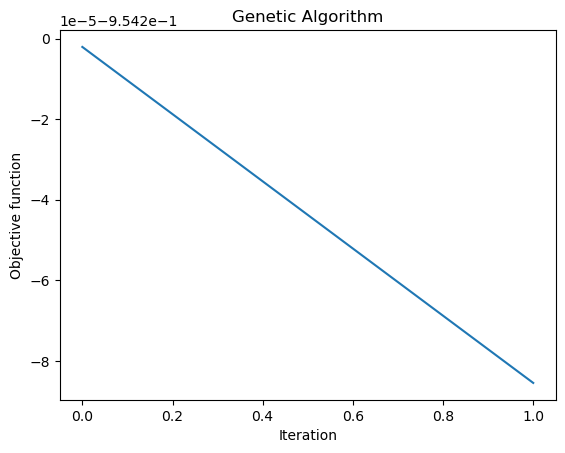

Best parameters found by genetic algorithm: [34.  2.  3.  1.]
Validation error of neural network: -0.9532617645775645


In [3]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from geneticalgorithm import geneticalgorithm as ga
import warnings

# Define functions for genetic algorithm fitness evaluation and neural network training
def fitness_function(params):
    # Decode parameters
    hidden_layer_sizes = (int(params[0]),) * int(params[1])
    activation = ['identity', 'logistic', 'tanh', 'relu'][int(params[2])]
    solver = ['lbfgs', 'sgd', 'adam'][int(params[3])]
    
    # Create and train neural network
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver)
    model.fit(X_train, y_train)
    
    # Evaluate fitness (example: mean squared error)
    fitness = -model.score(X_val, y_val)
    
    return fitness

def train_neural_network(params):
    # Decode parameters
    hidden_layer_sizes = (int(params[0]),) * int(params[1])
    activation = ['identity', 'logistic', 'tanh', 'relu'][int(params[2])]
    solver = ['lbfgs', 'sgd', 'adam'][int(params[3])]
    
    # Create and train neural network
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver)
    model.fit(X_train, y_train)
    
    # Evaluate neural network performance on validation data
    validation_error = -model.score(X_val, y_val)
    
    return validation_error

# Load your dataset
np.random.seed(42)

# Assuming you have features like temperature, humidity, etc., and you want to predict drying time
num_samples = 1000
num_features = 5  # Adjust based on your actual features

# Generate synthetic features
X = np.random.rand(num_samples, num_features)

# Generate synthetic target variable (drying time)
# Here, we'll assume a linear relationship with some noise
true_coefficients = np.random.rand(num_features) * 10  # Random coefficients for features
noise = np.random.normal(loc=0, scale=1, size=num_samples)  # Gaussian noise
y = np.dot(X, true_coefficients) + noise


# Example: Replace X_train, X_val, y_train, y_val with your dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

warnings.filterwarnings("ignore")

# Define genetic algorithm parameters
number_of_parameters = 4  # Adjust based on the number of parameters you want to optimize
varbound = np.array([[5, 50],  # Range for number of neurons in each hidden layer
                     [1, 5],    # Range for number of hidden layers
                     [0, 3],    # Activation function: 0 for identity, 1 for logistic, 2 for tanh, 3 for relu
                     [0, 2]])   # Solver: 0 for lbfgs, 1 for sgd, 2 for adam
algorithm_param = {'max_num_iteration': 1, 'population_size': 100, 'mutation_probability': 0.1,
                   'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': None}
model = ga(function=fitness_function, dimension=number_of_parameters, variable_type='int', variable_boundaries=varbound,
           algorithm_parameters=algorithm_param)

# Run the genetic algorithm
model.run()

# Get the best parameters found by the genetic algorithm
best_params = model.output_dict['variable']

# Train neural network with the best parameters
validation_error = train_neural_network(best_params)

print("Best parameters found by genetic algorithm:", best_params)
print("Validation error of neural network:", validation_error)

# Optionally, you can further evaluate the neural network on a test set
# and perform any additional analysis or visualization


In [2]:
pip install geneticalgorithm

  Obtaining dependency information for geneticalgorithm from https://files.pythonhosted.org/packages/ac/d2/fb9061239eaeee5c0373844f27f43514f33201bc08aea54d65b437402966/geneticalgorithm-1.0.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/44.3 kB ? eta -:--:--
     ---------------------------------------- 44.3/44.3 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15110 sha256=209865ee300d42874e665d3cad548cc3c678a39620637356e577aa5c22757f4b
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\07\e6\86\f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout
Note: you may need to restart the kernel to use updated packages.


In [4]:
import random
from deap import base, creator, tools, algorithms
 
# Define evaluation function (this is a mock function, replace this with your actual evaluation function)
def evaluate(individual):
    # Here 'individual' represents the parameters for the neural network
    # You'll need to replace this with your actual evaluation function that trains the neural network and evaluates its performance
    # Return a fitness value (here, a random number is used as an example)
    return random.random(),
 
# Define genetic algorithm parameters
POPULATION_SIZE = 10
GENERATIONS = 5
 
# Create types for fitness and individuals in the genetic algorithm
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
 
# Initialize toolbox
toolbox = base.Toolbox()
 
# Define attributes and individuals
toolbox.register("attr_neurons", random.randint, 1, 100)  # Example: number of neurons
toolbox.register("attr_layers", random.randint, 1, 5)  # Example: number of layers
toolbox.register("individual", tools.initCycle, creator.Individual, (toolbox.attr_neurons, toolbox.attr_layers), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
 
# Genetic operators
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=100, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
 
# Create initial population
population = toolbox.population(n=POPULATION_SIZE)
 
# Run the genetic algorithm
for gen in range(GENERATIONS):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    
    fitnesses = toolbox.map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit
    
    population = toolbox.select(offspring, k=len(population))
 
# Get the best individual from the final population
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual
 
# Print the best parameters found
print("Best Parameters:", best_params)


Best Parameters: [25, 2]


C:\Users\DELL\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\DELL\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [7]:
import numpy as np
from deap import base, creator, tools, algorithms
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample data
X, y = np.random.rand(100, 5), np.random.rand(100)

# Neural Network model builder
def build_model(n_neurons, lr):
    from keras import Input
    model = Sequential()
    model.add(Input(shape=(X.shape[1],)))
    model.add(Dense(n_neurons, activation='relu'))

    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    return model

# Evaluation function
def evaluate(individual):
    n_neurons = int(individual[0])
    lr = individual[1]
    model = build_model(n_neurons, lr)
    model.fit(X_train, y_train, epochs=30, verbose=0)
    preds = model.predict(X_test)
    return mean_squared_error(y_test, preds),  # Tuple

# Genetic Algorithm setup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_neuron", np.random.randint, 5, 100)
toolbox.register("attr_lr", np.random.uniform, 0.0001, 0.1)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_neuron, toolbox.attr_lr), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=5, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Run GA
pop = toolbox.population(n=10)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, verbose=True)

# Best individual
best = tools.selBest(pop, k=1)[0]
print("Best NN params: Neurons =", int(best[0]), "LR =", best[1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
gen	nevals
0  	10    
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1  	6     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
2  	6     
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━

In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Generate or load your dataset
X, y = np.random.rand(200, 5), np.random.rand(200)  # Replace with your real dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Step 2: Define the evaluation function
def evaluate(individual):
    neurons = int(individual[0])
    layers = int(individual[1])
    
    model = Sequential()
    from keras.layers import Input
    model.add(Input(shape=(X.shape[1],)))
    model.add(Dense(neurons, activation='relu'))

    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
    model.fit(X_train, y_train, epochs=5, verbose=0)
    
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse,

# Step 3: Genetic Algorithm Setup
POPULATION_SIZE = 10
GENERATIONS = 5

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_neurons", random.randint, 10, 100)
toolbox.register("attr_layers", random.randint, 1, 5)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_neurons, toolbox.attr_layers), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=1, up=100, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Step 4: Run the Genetic Algorithm
population = toolbox.population(n=POPULATION_SIZE)

for gen in range(GENERATIONS):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fitnesses = list(map(toolbox.evaluate, offspring))
    
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit
        
    population = toolbox.select(offspring, k=len(population))

# Step 5: Output best result
best_individual = tools.selBest(population, k=1)[0]
print("Best Parameters:", best_individual)
